In [5]:
import numpy as np
import pyccl as ccl
import matplotlib.pyplot as plt
from scipy import signal

## Tuesday Week 2 (16/07/2024): Have to create a class for an stellar mass profile
 - Look at https://github.com/LSSTDESC/CCL/blob/master/pyccl/halos/profiles/nfw.py as an example of the creation of a halo mass profile.
 - Python docs on classes: https://docs.python.org/3/tutorial/classes.html
 - Selected bits: 
   - the class inheritance mechanism allows multiple base classes
   - a derived class can override any methods of its base class or classes
   - a method can call the method of a base class with the same name

$\rho_X(r)\ = Ma ^{-3} f_X g_X(r)\$. 

- M = total halo mass
- $f_X$ = the fraction of that mass in gas species X
- $g(x)$ = the profile, which satisfies the normalisation $4\pi \int^{\inf)_0 dr r^2 g_X(r)\ = 1$
- a = the scale factor

$f_c + f_b + f_e + f_* = 1$ AND (assuming adiabaticity) $f_b + f_e + f_* = \bar{f}_b \equiv \frac{\Omega_b}{\Omega_M}$

(see: [pdf](../Background-reading/XrayCrossCorrelations-1.pdf)).  
$g_*(r)\ \equiv \delta^D$(**x**) , centred at $r=0$. (a Delta function; Dirac delta function = also called the "unit impulse")   
& the Fourier profile is then:   
$\tilde{g}_*(k)\ = 1$

In [ ]:
signal.unit_impulse(len(trial_r), None)
# np.where(trial_r2==0)[0]#[0]

In [59]:
class stellar_profile(ccl.halos.profiles.profile_base.HaloProfile): #(ccl.halos.Haloprofile):
    """Creating a class for the stellar density profile
    where: """  # could put in the equations used

    def __init__(self, mass_def):
        super(stellar_profile, self).__init__(mass_def=mass_def)

    def _real(self, r, M, centre_pt=None, # want delta centred at r=0 (& since log scale, can't do negative or zero values in array)
              a=1): # set the default pars for scale factor a 
        r_use = np.atleast_1d(r) # need them to be functional arrays
        M_use = np.atleast_1d(M)
        len_r = len(r_use) # np.shape(r_use)[0] # equivalent to len(r), but allows for multi-dim arrays
# Returns: float or array_like: halo profile. Shape of output = `(N_M, N_r)` where `N_r` & `N_m` = the sizes of `r` & `M` respectively.

        prefix = M_use / a**3
    # unit_impulse(shape, idx=None, dtype=<class 'float'>) ; idx = Index at which the value is 1. If None, defaults to the 0th element.
    # If idx='mid', the impulse will be centered at shape // 2 in all dimensions. If an int, the impulse will be at idx in all dimensions.
      #  prof = prefix[:, None] * signal.unit_impulse(len_r)[None,:]
        prof = prefix[:, None] * signal.unit_impulse(len_r, centre_pt)[None,:]

        # want dirac delta(x=0)
       # r_array = r_use
       # for r in r_use:
       #     if r==0:
                
        
        if np.ndim(r) == 0:
            prof = np.squeeze(prof, axis=-1)
        if np.ndim(M) == 0:
            prof = np.squeeze(prof, axis=0)
                                                          
        return prof

    def _fourier(self, k, M, a=1):
        k_use = np.atleast_1d(k)
        M_use = np.atleast_1d(M)

        prefix = M_use / a**3
        prof = np.ones_like(k_use)[None,:] * prefix[:, None] # k_use[None,:] + prefix[:, None] * 1 # as g(k) = 1

        if np.ndim(k) == 0:
            prof = np.squeeze(prof, axis=-1)
        if np.ndim(M) == 0:
            prof = np.squeeze(prof, axis=0)

        return prof
    

In [61]:
# working with z = 0 (today) ; therefore a = 1
# use a mass definition with Delta = 200
hmd_200c = ccl.halos.MassDef200c
trial_Prof = stellar_profile(hmd_200c)

In [63]:
trial_r = np.geomspace(1E-2,1E8,100000) # geomspace is like linspace, but evenly spaces on a logscale
trial_M = np.array([5E12,2E13, 1E14])
profTrial_real = trial_Prof._real(trial_r, trial_M)
profTrial_real  # _real(self, r, M, centre_pt='mid', a=1)

array([[5.e+12, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [2.e+13, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [1.e+14, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00]])

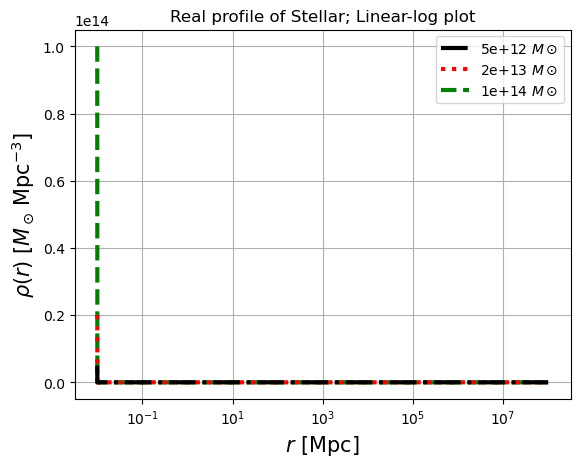

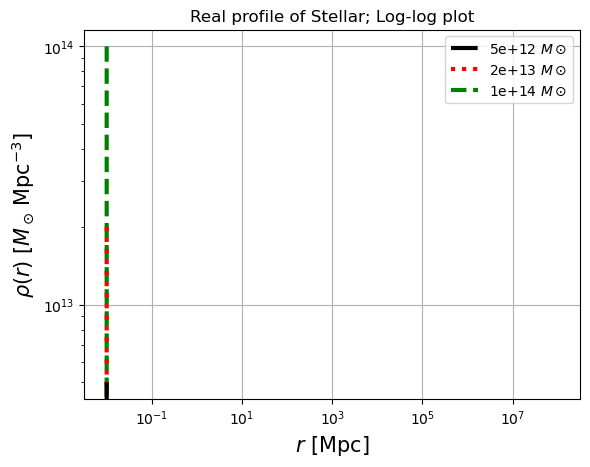

In [65]:
colours = ['k-.', 'r:', 'g--']
i = 0
for j in trial_M:
    plt.plot(trial_r, profTrial_real[i], colours[i], lw=3, zorder = (10-i), label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
plt.ylabel(r'$\rho(r)\,\,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$r\,\,[{\rm Mpc}]$', fontsize=15);
plt.title('Real profile of Stellar; Linear-log plot')
plt.grid(True)
plt.xscale('log');
plt.legend(loc='best')
#plt.xlim(1e-2,1e5);
#plt.ylim(1e-2,1e5);

plt.figure()
i = 0
for j in trial_M:
    plt.plot(trial_r, profTrial_real[i], colours[i], lw=3, zorder = (10-i), label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
plt.ylabel(r'$\rho(r)\,\,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$r\,\,[{\rm Mpc}]$', fontsize=15);
plt.title('Real profile of Stellar; Log-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
plt.yscale('log');
#plt.xlim(1e-2,1e5);
#plt.ylim(1e-2,1e5);

In [66]:
trial_k = np.geomspace(1E-20,1E2,100000)
trial_M = np.array([5E12,2E13, 1E14])
profTrial_fourier = trial_Prof._fourier(trial_k, trial_M)
profTrial_fourier

array([[5.e+12, 5.e+12, 5.e+12, ..., 5.e+12, 5.e+12, 5.e+12],
       [2.e+13, 2.e+13, 2.e+13, ..., 2.e+13, 2.e+13, 2.e+13],
       [1.e+14, 1.e+14, 1.e+14, ..., 1.e+14, 1.e+14, 1.e+14]])

#### Normalisation of profiles means that:   
$\rho(k \to 0)\ _x = \frac{M_x}{a^3} [f_x]$   
#### So plotting $y = x + \frac{M_x}{a^3} [f_x]$ should give an overlap with the [normalised] Fourier density profile's plateau

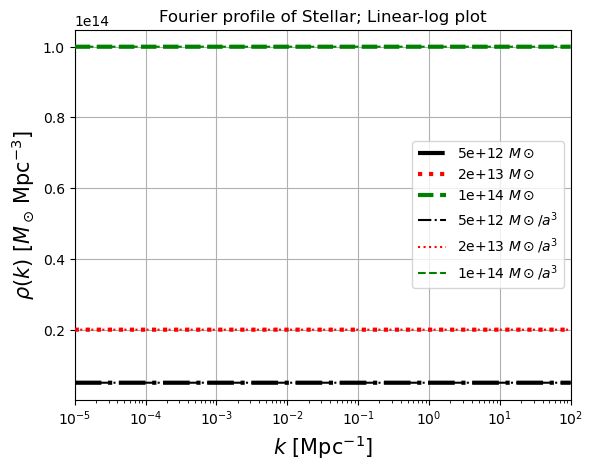

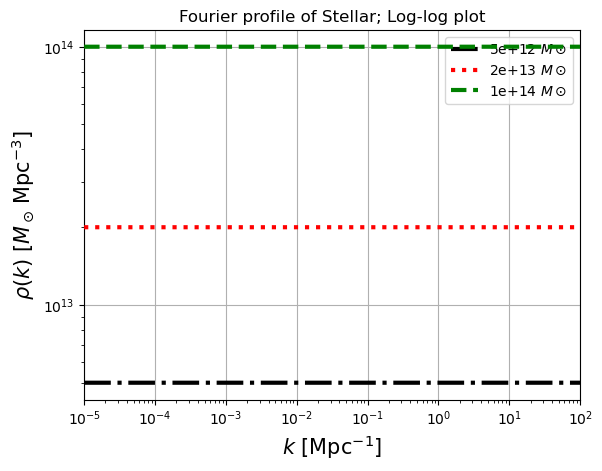

In [69]:
#### colours = ['k-.', 'r:', 'g--']
i = 0
for j in trial_M:
    plt.plot(trial_k, profTrial_fourier[i], colours[i], lw=3, zorder = (10-i), label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
for mass, col in zip(trial_M, colours):
    plt.plot(trial_k, 1*trial_k + mass, col, zorder=(10-i), label=f'{mass:.1g} $M \\odot /a^3$')   # here, a=1 & f=1
plt.ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
plt.title('Fourier profile of Stellar; Linear-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
plt.xlim(1e-5,1e2);
#plt.ylim(1e-5,1e2);

plt.figure()
i = 0
for j in trial_M:
    plt.plot(trial_k, profTrial_fourier[i], colours[i], lw=3, zorder = (10-i), label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
plt.ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
plt.title('Fourier profile of Stellar; Log-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
plt.yscale('log');
plt.xlim(1e-5,1e2);
#plt.ylim(1e-5,1e2);

# Check my Fourier against the inbuilt Fourier method

In [18]:
class stelProf(ccl.halos.profiles.profile_base.HaloProfile): #(ccl.halos.Haloprofile):
    """Creating a class for the stellar density profile
    where: """  # could put in the equations used

    def __init__(self, mass_def):
        super(stelProf, self).__init__(mass_def=mass_def)

    def _real(self, cosmo, r, M, #centre_pt='mid', # want delta centred at r=0 (& since log scale, can't do negative or zero values in array)
              a=1): # set the default pars for scale factor a 
        r_use = np.atleast_1d(r) # need them to be functional arrays
        M_use = np.atleast_1d(M)
        len_r = len(r_use) # np.shape(r_use)[0] # equivalent to len(r), but allows for multi-dim arrays
# Returns: float or array_like: halo profile. Shape of output = `(N_M, N_r)` where `N_r` & `N_m` = the sizes of `r` & `M` respectively.

        prefix = M_use / a**3
    # unit_impulse(shape, idx=None, dtype=<class 'float'>) ; idx = Index at which the value is 1. If None, defaults to the 0th element.
    # If idx='mid', the impulse will be centered at shape // 2 in all dimensions. If an int, the impulse will be at idx in all dimensions.
        prof = prefix[:, None] * signal.unit_impulse(len_r)[None,:]
        if np.ndim(r) == 0:
            prof = np.squeeze(prof, axis=-1)
        if np.ndim(M) == 0:
            prof = np.squeeze(prof, axis=0)
                                                          
        return prof
    

In [20]:
# working with z = 0 (today) ; therefore a = 1 # use a mass definition with Delta = 200
hmd_200c = ccl.halos.MassDef200c
builtIn_trial = stelProf(hmd_200c)

In [26]:
#trial_r = np.geomspace(1E-2,1E8,100000) # geomspace is like linspace, but evenly spaces on a logscale
#trial_M = np.array([5E12,2E13, 1E14])
cosmo = ccl.Cosmology(Omega_c = 0.25, Omega_b=0.05, h=0.07, A_s=2.1e-9, n_s=0.96, Neff=0, Omega_g=0)
builtIn_real = builtIn_trial._real(cosmo, trial_r, trial_M)
builtIn_real  # _real(self, r, M, centre_pt='mid', a=1)

array([[5.e+12, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [2.e+13, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [1.e+14, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00]])

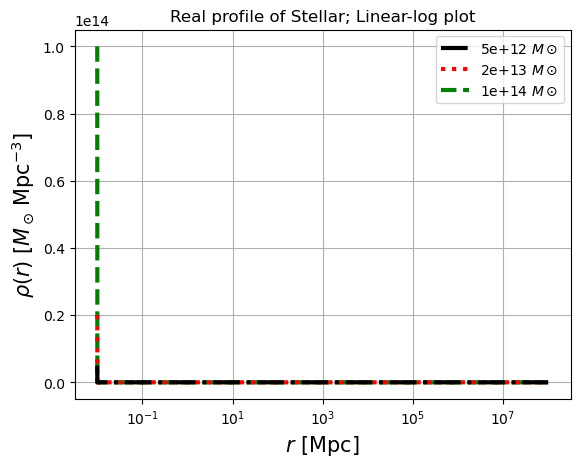

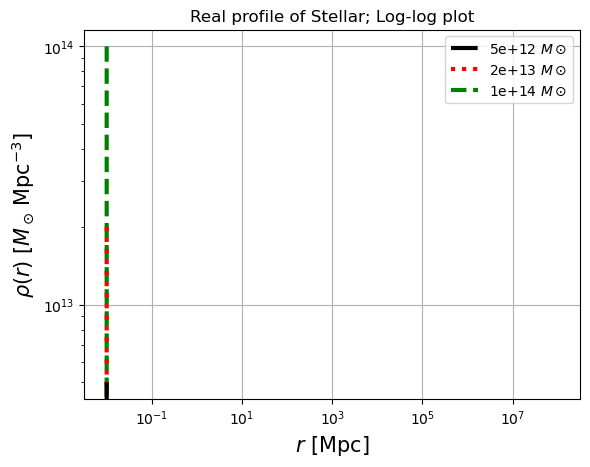

In [28]:
colours = ['k-.', 'r:', 'g--']
i = 0
for mass, prof, col in zip(trial_M, builtIn_real, colours):
    plt.plot(trial_r, prof, col, lw=3, zorder = (10-i), label=f'{mass:.1g} $M \\odot $')
    i+=1
plt.ylabel(r'$\rho(r)\,\,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$r\,\,[{\rm Mpc}]$', fontsize=15);
plt.title('Real profile of Stellar; Linear-log plot')
plt.grid(True)
plt.xscale('log');
plt.legend(loc='best')
#plt.xlim(1e-2,1e5); #plt.ylim(1e-2,1e5);

plt.figure()
i = 0
for mass, prof, col in zip(trial_M, builtIn_real, colours):
    plt.plot(trial_r, prof, col, lw=3, zorder = (10-i), label=f'{mass:.1g} $M \\odot $')
    i+=1
plt.ylabel(r'$\rho(r)\,\,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$r\,\,[{\rm Mpc}]$', fontsize=15);
plt.title('Real profile of Stellar; Log-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
plt.yscale('log');
#plt.xlim(1e-2,1e5); #plt.ylim(1e-2,1e5);

In [30]:
ccl.halos.profiles.profile_base.HaloProfile.fourier

<function pyccl.halos.profiles.profile_base.HaloProfile.fourier(self, cosmo, k, M, a)>

In [38]:
# print('cosmo: ', type(cosmo), cosmo) 
trial_k2 = np.geomspace(1E-20,1E-1,100000)
builtIn_fourier = builtIn_trial.fourier(cosmo=cosmo, k=trial_k2, M=trial_M, a=1)
builtIn_fourier

array([[7.75160198e-19, 7.75153219e-19, 7.75146240e-19, ...,
        7.73046630e-20, 7.72976843e-20, 7.72907055e-20],
       [3.10064079e-18, 3.10061288e-18, 3.10058496e-18, ...,
        3.09218652e-19, 3.09190737e-19, 3.09162822e-19],
       [1.55032040e-17, 1.55030644e-17, 1.55029248e-17, ...,
        1.54609326e-18, 1.54595369e-18, 1.54581411e-18]])

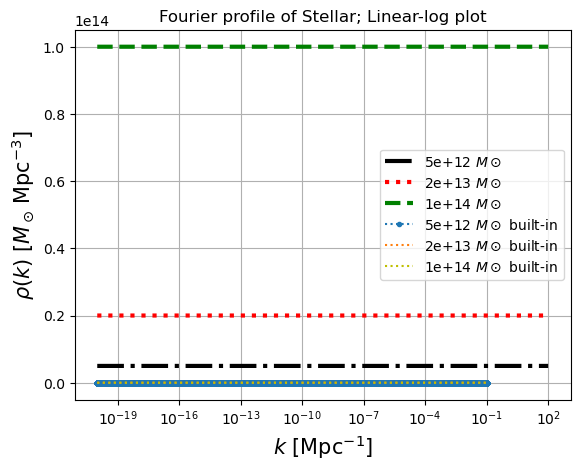

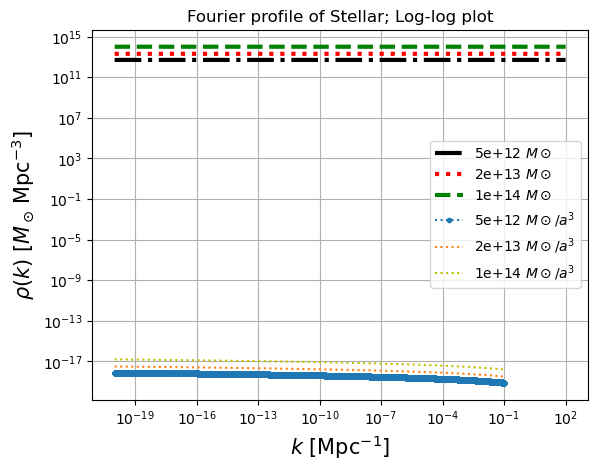

In [40]:
colours2 = [':.', ':', 'y:']
i = 0
for mass, prof, col in zip(trial_M, profTrial_fourier, colours):
    plt.plot(trial_k, prof, col, lw=3, zorder = (10-i), label=f'{mass:.1g} $M \\odot $')
    i+=1
for mass, col, prof in zip(trial_M, colours2, builtIn_fourier):
    plt.plot(trial_k2, prof, col, zorder=(5-i), label=f'{mass:.1g} $M \\odot $ built-in')   # here, a=1 & f=1
plt.ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
plt.title('Fourier profile of Stellar; Linear-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
#plt.xlim(1e-5,1e2);
#plt.ylim(1e-5,1e2);

plt.figure()
i = 0
for j in trial_M:
    plt.plot(trial_k, profTrial_fourier[i], colours[i], lw=3, zorder = (10-i), label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
for mass, col, prof in zip(trial_M, colours2, builtIn_fourier):
    plt.plot(trial_k2, prof, col, zorder=(5-i), label=f'{mass:.1g} $M \\odot /a^3$')   # here, a=1 & f=1
plt.ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
plt.title('Fourier profile of Stellar; Log-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
plt.yscale('log');
#plt.xlim(1e-5,1e2);
#plt.ylim(1e-5,1e2);

# Testing the importation of the StellarProfile class from its .py file

In [1]:
import BCMprofiles as stel_tester

/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCMprofiles.py:12: SyntaxWarning: invalid escape sequence '\ '
  """Creating a class for the stellar density profile
/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCMprofiles.py:94: SyntaxWarning: invalid escape sequence '\ '
  """Creating a class for the bound gas density profile where:
/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCMprofiles.py:334: SyntaxWarning: invalid escape sequence '\e'
  """Combined profile for the stellar & ejected & bound gas & cdm components (ie- The BCM Model), with the truncated Navarro-Frenk-White (NFW) profile used to calculate the density profiles of the cold dark matter (cdm) component.


In [2]:
help(stel_tester)

Help on module BCMprofiles:

NAME
    BCMprofiles

CLASSES
    pyccl.halos.profiles.profile_base.HaloProfile(pyccl._core.schema.CCLAutoRepr)
        BoundGasProfile
        CombinedAllBCMProfile
        CombinedGasProfile
        CombinedStellarGasProfile
        EjectedGasProfile
        StellarProfile

    class BoundGasProfile(pyccl.halos.profiles.profile_base.HaloProfile)
     |  BoundGasProfile(self, cosmo, mass_def, concentration, gamma, GammaRange=(1.01, 10), nGamma=64, qrange=(0.0001, 100.0), nq=64)
     |
     |  Creating a class for the bound gas density profile where:
     |  .. math::
     |      \rho_b(r)\ = Ma ^{-3} & g_b(r)\ = \frac{1}{V_b} \left( \frac{log(1 + \frac{r}{r_s})}{\frac{r}{r_s}} \right)^{\frac{1}{\Gamma - 1}}     , where log \equiv ln.
     |      V_b \equiv 4\pi r_s^3 I_b(\frac{1}{\Gamma - 1}, 0)\ .
     |      I_b(\gamma, q)\ = \int^{\infty}_0 dx\ x^2 \left( \frac{log(1+x)}{x} \right)^{\gamma} j_0(qx)\, with q = kr_s [in Fourier space].
ight)^{rac{1}{\Gam

In [6]:
stel_tester.StellarProfile

BCMprofiles.StellarProfile

In [161]:
tester = stel_tester.StellarProfile(hmd_200c)
tester._real(trial_r, trial_M)

array([[5.e+12, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [2.e+13, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [1.e+14, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00]])